In [ ]:
# ===========================================
# Assignment No. 8 (Group C - ML)
# Title: Binary Classification using Logistic Regression
# Dataset: Rain in Australia (Kaggle)
# ===========================================

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [ ]:
# Step 2: Load Dataset (from official Rattle source)
url = "http://rattle.togaware.com/weatherAUS.csv"
data = pd.read_csv(url)

print("✅ Dataset Loaded Successfully!")
print("Shape:", data.shape)
print(data.head())


✅ Dataset Loaded Successfully!
Shape: (266946, 24)
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Te

In [ ]:
# Step 3: Data Preprocessing
# Drop rows with too many missing values
data = data.dropna(subset=["RainToday", "RainTomorrow", "Humidity3pm", "Rainfall", "MaxTemp", "MinTemp", "WindGustSpeed"])

# Select important features
features = ["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "Humidity3pm", "RainToday"]
target = "RainTomorrow"

X = data[features]
y = data[target]

# Encode categorical features
le = LabelEncoder()
X["RainToday"] = le.fit_transform(X["RainToday"])
y = le.fit_transform(y)   # Yes=1, No=0

# Handle missing values (if any)
X = X.fillna(X.mean())

/tmp/ipython-input-2120583147.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["RainToday"] = le.fit_transform(X["RainToday"])


In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 6: Build Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

In [ ]:
# Step 7: Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]


In [ ]:
# Step 8: Evaluation
print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



🎯 Accuracy: 0.8465503401073133

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     37158
           1       0.72      0.47      0.57     10180

    accuracy                           0.85     47338
   macro avg       0.79      0.71      0.74     47338
weighted avg       0.84      0.85      0.83     47338



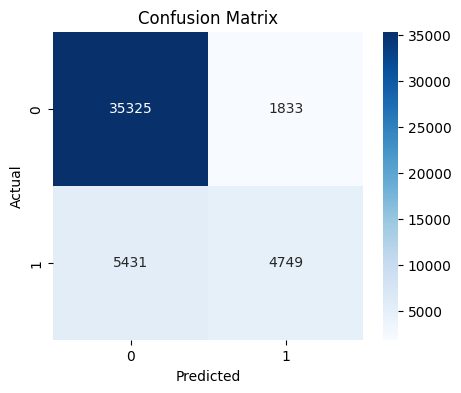

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

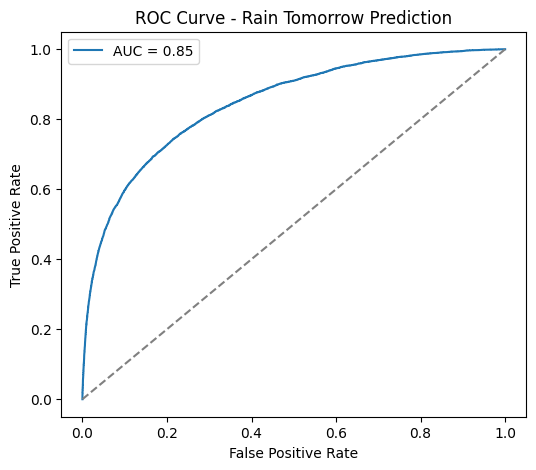

In [ ]:
# Step 9: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Rain Tomorrow Prediction")
plt.legend()
plt.show()

In [ ]:
# Step 10: Example Prediction
example = np.array([[15.0, 28.0, 2.0, 35.0, 60.0, 1]])  # RainToday = 1(Yes)
example_scaled = scaler.transform(example)
pred = model.predict(example_scaled)[0]

if pred == 1:
    print("☔ Prediction: It will RAIN tomorrow.")
else:
    print("🌤️ Prediction: It will NOT rain tomorrow.")

🌤️ Prediction: It will NOT rain tomorrow.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
